# Chapter 1

## Estimates of Location

In [1]:
import pandas as pd 
from scipy.stats import trim_mean

In [2]:
df = pd.read_csv('../../../data/state.csv')

In [3]:
# A quick preview of the data
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
# Mean population per state 
df['Population'].mean()

6162876.3

In [5]:
# Trimmed mean of population per state
trim_mean(df['Population'], 0.1)

4783697.125

In [6]:
# Median of the population 
df['Population'].median()

4436369.5

For weighted means and medians, we have to do something a little bit more differently: 

In [7]:
import numpy as np 
!pip3 install wquantiles
import wquantiles 

In [8]:
# Weighted Mean
np.average(df['Murder.Rate'], weights=df['Population'])

4.445833981123393

In [9]:
# Weighted median
wquantiles.median(df['Murder.Rate'], weights = df['Population'])

4.4

## Estimates of Variability

In [10]:
# Let's calculate some variability of state populations
# Standard Deviation
df['Population'].std()

6848235.347401142

In [11]:
# IQR 
df['Population'].quantile(0.75) - df['Population'].quantile(0.25)

4847308.0

In [12]:
# Robust MAD (Median absolute deviation from the median)
from statsmodels.robust.scale import mad 
mad(df['Population'])

3849876.1459979336

In [13]:
# Notice how much larger the STD is to the MAD. This is because Standard Deviation is sensitive to outliers
df['Population'].std()/mad(df['Population'])

1.778819652294554

## Box and Whiskers Plot

Text(0, 0.5, 'Population (millions)')

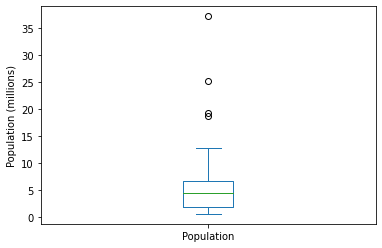

In [14]:
ax = (df['Population']/1000000).plot.box() 
ax.set_ylabel('Population (millions)')

## Histogram / Frequency Table

In [15]:
binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

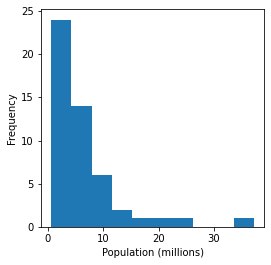

In [18]:
ax = (df['Population'] / 1000000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

### Density Plot

Text(0.5, 0, 'Murder Rate (per 100,000)')

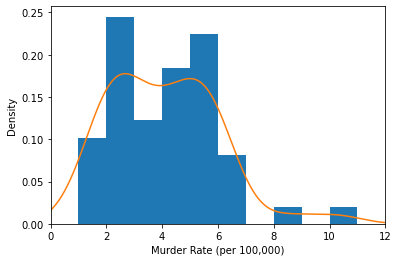

In [20]:
ax = df['Murder.Rate'].plot.hist(density = True, xlim = [0,12], bins = range(1,12))
df['Murder.Rate'].plot.density(ax = ax)
ax.set_xlabel('Murder Rate (per 100,000)')

# Exploring Categorical/Binary Data

In [3]:
import pandas as pd 
dfw = pd.read_csv('/Users/austin/Desktop/practical-statistics-for-data-scientists/data/dfw_airline.csv')

Text(0, 0.5, 'Count')

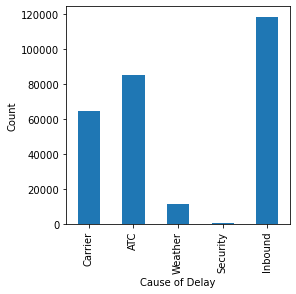

In [6]:
ax = dfw.transpose().plot.bar(figsize = (4,4), legend = False)
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')

## Correlation

In [10]:
# Below is just so we can read this data
from pathlib import Path
import pandas as pd
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'

sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

<AxesSubplot:>

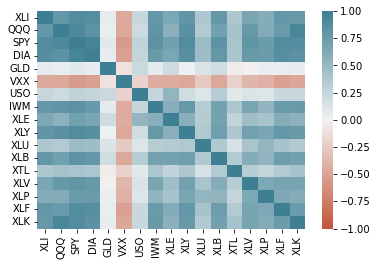

In [12]:
# Correlation Matrix
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
import seaborn as sns 
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1, cmap = sns.diverging_palette(20,220, as_cmap = True))

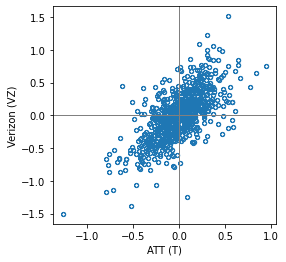

In [15]:
# Scatterplot
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

ax = telecom.plot.scatter(x = 'T', y = 'VZ', figsize =(4,4), marker = '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color = 'grey', lw = 1)
ax.axvline(0, color = 'grey', lw = 1)

## Exploring Two or More Variables

In [17]:
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


In [18]:
kc_tax0.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


Text(0, 0.5, 'Tax-Assessed Value')

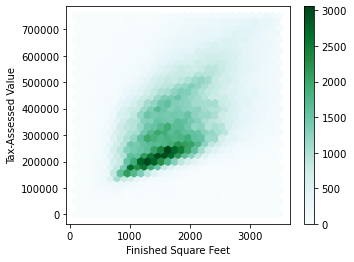

In [19]:
# Hexagonal binning, since this data set is too large to get accurate metrics via a scatterplot.
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue', gridsize = 30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

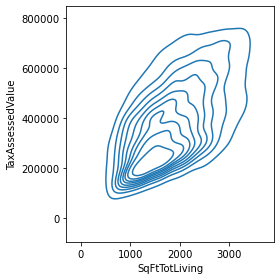

In [27]:
# Contour Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4))

data = kc_tax0.sample(10000)
sns.kdeplot(data.SqFtTotLiving, y = data.TaxAssessedValue, ax = ax)
plt.tight_layout()
plt.show()


## Categorical and Numerical Data

In [21]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)

In [29]:
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


Text(0.5, 0.98, '')

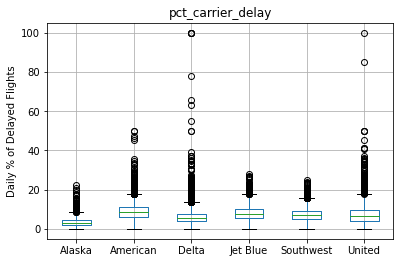

In [28]:
# Box plot with multiple categories.
ax = airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Text(0, 0.5, 'Daily % of Delayed Flights')

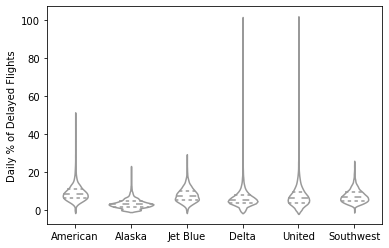

In [30]:
# Violin plot
ax = sns.violinplot(x = airline_stats.airline, y = airline_stats.pct_carrier_delay, inner = 'quartile', color = 'white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

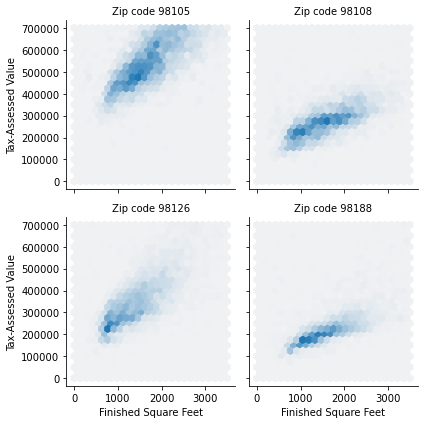

In [31]:
#Multiple variables
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]

def hexbin(x, y, color, **kwargs): 
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize = 25, cmap = cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0,3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')